# En este ejercicio a calcular la importancia relativa de las features#
 
Vamos a intentar responder a la pregunta, 

¿ Qué carácterísticas son mas importantes en un equipo, para estar bien clasificado ? 


In [1]:


import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import html5lib
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn                  import svm ,  metrics
from sklearn.metrics        import mean_squared_error

#df = pd.read_html("http://www.mundodeportivo.com/resultados/futbol/laliga/clasificacion.html")[0]

df = pd.read_csv("datasets/equipos.csv")



/Users/jaimevalero/miniconda3/envs/flask/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:

df["Resultado"]   =  "Zona fria"
df["Resultado"].iloc[4:6]     = "Europa League"
df["Resultado"].iloc[0:4]     = "Champions League"
df["Resultado"].iloc[16:20]   = "Descenso"
df["Resultado"].iloc[6:16]    = "Zona fria"


In [3]:
import lantern as l
l.VariableInspector()
l.VariableInspector

AttributeError: module 'lantern' has no attribute 'VariableInspector'

In [3]:
# Quitamos la info innecesaria
del df["Equipo"]
df

PJ  PG  PE  PP  GF  GC  DIF  PTS         Resultado
0   37  27   9   1  98  29   69   90  Champions League
1   37  23   9   5  56  20   36   78  Champions League
2   37  22   9   6  92  42   50   75  Champions League
3   37  21   7   9  63  37   26   70  Champions League
4   37  18   6  13  55  48    7   60     Europa League
5   37  18   6  13  58  58    0   60     Europa League
6   37  16   7  14  48  58  -10   55         Zona fria
7   37  14  10  13  41  33    8   52         Zona fria
8   37  14   8  15  42  48   -6   50         Zona fria
9   37  14   7  16  66  58    8   49         Zona fria
10  37  13   9  15  48  58  -10   48         Zona fria
11  37  15   2  20  40  49   -9   47         Zona fria
12  37  12  10  15  55  58   -3   46         Zona fria
13  37  11  13  13  35  42   -7   46         Zona fria
14  37  11  13  13  42  54  -12   46         Zona fria
15  37  10  13  14  41  48   -7   43         Zona fria
16  37  11   7  19  31  49  -18   40          Descenso
17  37   6  11  20  37  74  -37   29          Descenso
18  37   5   7  25  23  72  -49   22          Descenso
19  37   5   5  27  24  60  -36   20          Descenso

## Sacamos las distribuciones y el histograma, ##

In [4]:
import matplotlib.pyplot as plt
df.boxplot()
df.describe()


PJ        PG        PE         PP         GF         GC       DIF  \
count  20.0  20.00000  20.00000  20.000000  20.000000  20.000000  20.00000   
mean   37.0  14.30000   8.40000  14.300000  49.750000  49.750000   0.00000   
std     0.0   5.94802   2.81724   6.224738  19.466233  13.447265  28.44015   
min    37.0   5.00000   2.00000   1.000000  23.000000  20.000000 -49.00000   
25%    37.0  11.00000   7.00000  13.000000  39.250000  42.000000 -10.50000   
50%    37.0  14.00000   8.50000  14.000000  45.000000  49.000000  -6.50000   
75%    37.0  18.00000  10.00000  16.750000  56.500000  58.000000   8.00000   
max    37.0  27.00000  13.00000  27.000000  98.000000  74.000000  69.00000   

             PTS  
count  20.000000  
mean   51.300000  
std    17.681688  
min    20.000000  
25%    45.250000  
50%    48.500000  
75%    60.000000  
max    90.000000

Explicación boxplot
<img src="images/boxplot.png" width="400" ALIGN=”left”/>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1153705c0>,
      dtype=object)

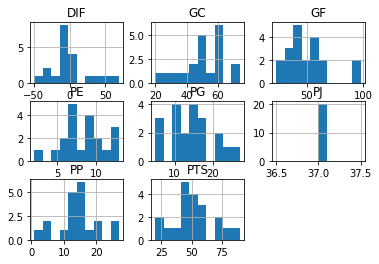

In [5]:
df.hist()


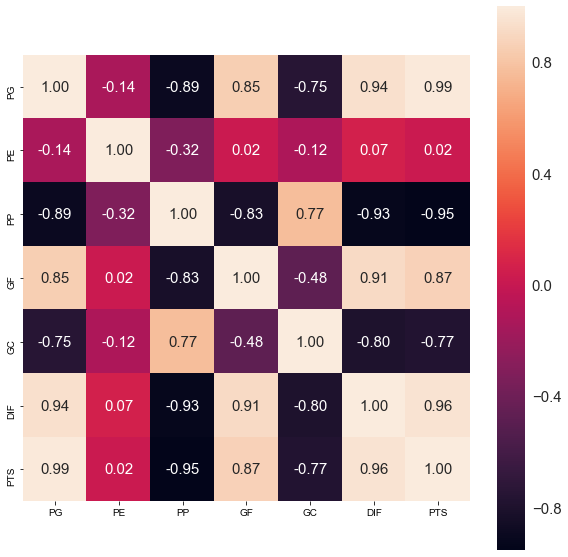

In [6]:
import seaborn as sns
import numpy as np


cols = [ 'PG', 'PE', 'PP', 'GF', 'GC', 'DIF', 'PTS']

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

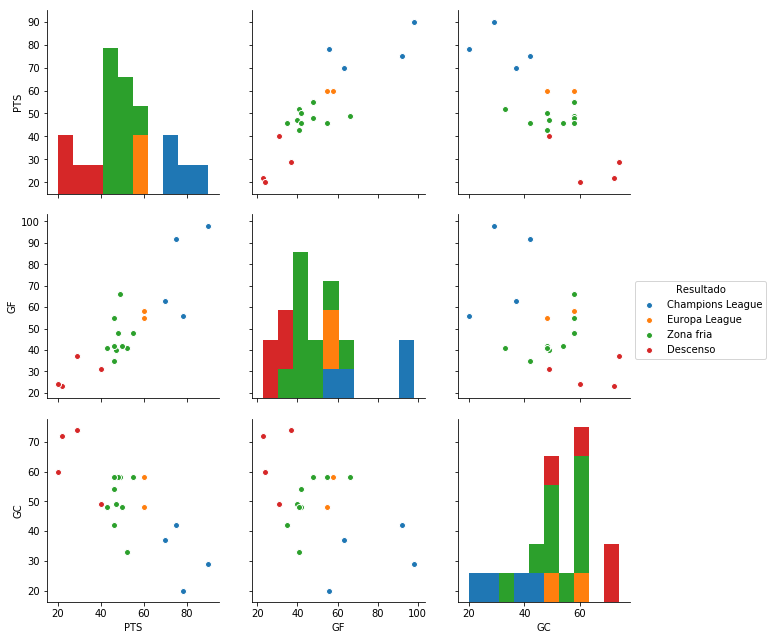

In [7]:
import seaborn.apionly as sns

sns.pairplot( data=df[[ "PTS" , "GF" , "GC" , "Resultado" ]] ,hue="Resultado", size=3)



## Seleccionamos las 3 Features mas importantes. ##

Beneficios de reducir las dimensiones

- Reduce el overfiting, porque hace menos probable tomar decisiones basadas en ruido.
- Mejora los tiempos de training. Al haber menos datos es mas rápido.


In [8]:
from sklearn.feature_selection import RFE 
"""
De la docu oficial : Feature ranking with Recursive Feature Elimination.

Given an external estimator that assigns weights to features, 
the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.
"""

from sklearn.linear_model import LogisticRegression
  
NUM_COLUMNAS=df.shape[1]

array = df.values
X = array[:,0:NUM_COLUMNAS-1]
Y = array[:,NUM_COLUMNAS-1]

print("X:" , X)
print("Y:" , Y)

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

# Print results
print("Columnas: "          , df.columns      ) 
print("Num Features: "      , fit.n_features_ ) 
print("Selected Features: " , fit.support_    )
print("Feature Ranking: "   , fit.ranking_    )


X: [[37 27 9 1 98 29 69 90]
 [37 23 9 5 56 20 36 78]
 [37 22 9 6 92 42 50 75]
 [37 21 7 9 63 37 26 70]
 [37 18 6 13 55 48 7 60]
 [37 18 6 13 58 58 0 60]
 [37 16 7 14 48 58 -10 55]
 [37 14 10 13 41 33 8 52]
 [37 14 8 15 42 48 -6 50]
 [37 14 7 16 66 58 8 49]
 [37 13 9 15 48 58 -10 48]
 [37 15 2 20 40 49 -9 47]
 [37 12 10 15 55 58 -3 46]
 [37 11 13 13 35 42 -7 46]
 [37 11 13 13 42 54 -12 46]
 [37 10 13 14 41 48 -7 43]
 [37 11 7 19 31 49 -18 40]
 [37 6 11 20 37 74 -37 29]
 [37 5 7 25 23 72 -49 22]
 [37 5 5 27 24 60 -36 20]]
Y: ['Champions League' 'Champions League' 'Champions League'
 'Champions League' 'Europa League' 'Europa League' 'Zona fria'
 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria'
 'Zona fria' 'Zona fria' 'Zona fria' 'Descenso' 'Descenso' 'Descenso'
 'Descenso']
Columnas:  Index(['PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DIF', 'PTS', 'Resultado'], dtype='object')
Num Features:  3
Selected Features:  [False False  True  True False False  True False]
Feature 

# Importancia relativa de la features

[0.         0.10759427 0.06398454 0.18081193 0.1702411  0.09871255
 0.19592047 0.18273514]


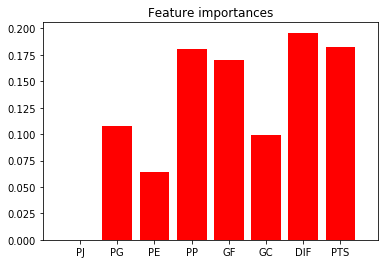

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), model.feature_importances_,
       color="r",  align="center")
plt.xticks(range(X.shape[1]), df.columns)
plt.xlim([-1, X.shape[1]])
plt.show()

Y si quitamos los puntos (que es un valor calculado a partir de otras columnas) 
¿ Qué features seran las mas importantes ? 

In [10]:
df_sinpuntos = df
del df_sinpuntos['PTS']
df.head(2)

PJ  PG  PE  PP  GF  GC  DIF         Resultado
0  37  27   9   1  98  29   69  Champions League
1  37  23   9   5  56  20   36  Champions League

X: [[37 27 9 1 98 29 69]
 [37 23 9 5 56 20 36]
 [37 22 9 6 92 42 50]
 [37 21 7 9 63 37 26]
 [37 18 6 13 55 48 7]
 [37 18 6 13 58 58 0]
 [37 16 7 14 48 58 -10]
 [37 14 10 13 41 33 8]
 [37 14 8 15 42 48 -6]
 [37 14 7 16 66 58 8]
 [37 13 9 15 48 58 -10]
 [37 15 2 20 40 49 -9]
 [37 12 10 15 55 58 -3]
 [37 11 13 13 35 42 -7]
 [37 11 13 13 42 54 -12]
 [37 10 13 14 41 48 -7]
 [37 11 7 19 31 49 -18]
 [37 6 11 20 37 74 -37]
 [37 5 7 25 23 72 -49]
 [37 5 5 27 24 60 -36]]
Y: ['Champions League' 'Champions League' 'Champions League'
 'Champions League' 'Europa League' 'Europa League' 'Zona fria'
 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria'
 'Zona fria' 'Zona fria' 'Zona fria' 'Descenso' 'Descenso' 'Descenso'
 'Descenso']
[0.         0.26503463 0.03962241 0.22401824 0.16254509 0.09887266
 0.20990697]


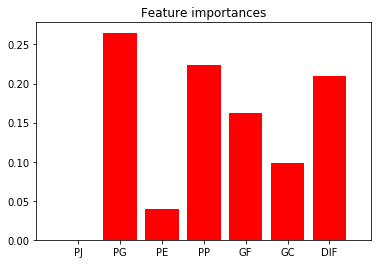

In [11]:


X = df_sinpuntos.values[:,0:7]
Y = df_sinpuntos.values[:,7]


print("X:" , X)
print("Y:" , Y)

model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), model.feature_importances_,
       color="r",  align="center")
plt.xticks(range(X.shape[1]), df.columns)
plt.xlim([-1, X.shape[1]])
plt.show()

**Conclusión**, si no contamos los puntos que lleva el equpo, lo mas importante para predecir si un equipo ira a europa/descenderá.
- Son los partidos ganados PG , 

- y meter mas goles de los que te meten DIF.

Solo por eso, voy a volver a poner la foto de la neurona.

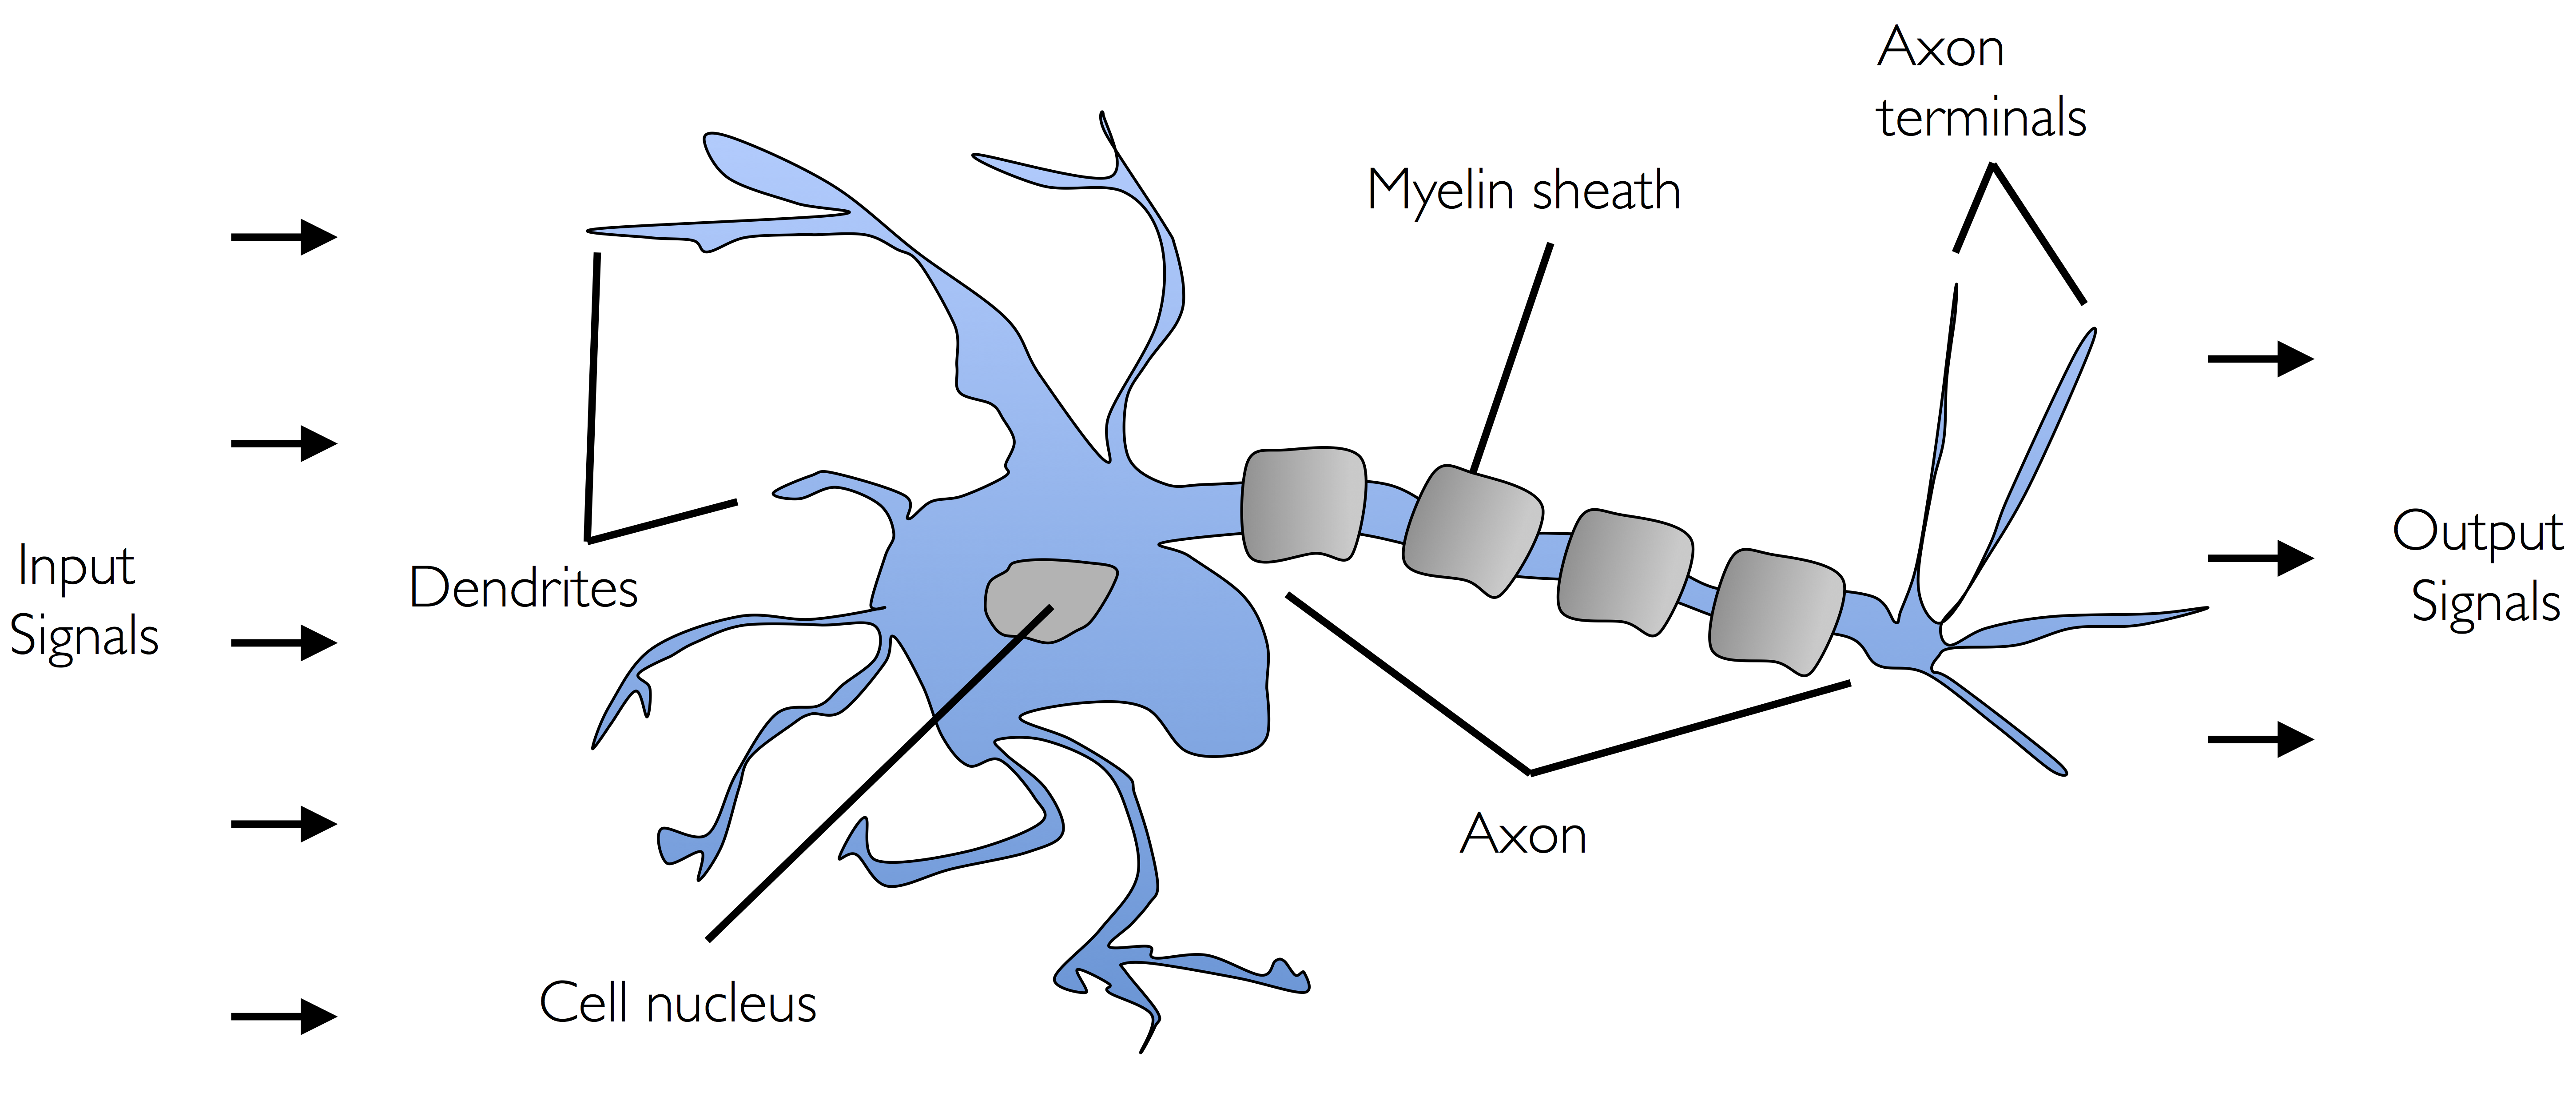

In [12]:
from IPython.display import Image
Image(filename='./images/02_01.png', width=500) 

### Bonus track : Quitar dimensiones usando PCA ###

Una forma fácil de reducir dimensionas es usa PCA.

En el ejemplo, quitamos dimensiones a nuestro dataset de futbol, reduciendo a dos dimensiones.

[[37 27 9 1 98 29 69]
 [37 23 9 5 56 20 36]
 [37 22 9 6 92 42 50]
 [37 21 7 9 63 37 26]
 [37 18 6 13 55 48 7]
 [37 18 6 13 58 58 0]
 [37 16 7 14 48 58 -10]
 [37 14 10 13 41 33 8]
 [37 14 8 15 42 48 -6]
 [37 14 7 16 66 58 8]
 [37 13 9 15 48 58 -10]
 [37 15 2 20 40 49 -9]
 [37 12 10 15 55 58 -3]
 [37 11 13 13 35 42 -7]
 [37 11 13 13 42 54 -12]
 [37 10 13 14 41 48 -7]
 [37 11 7 19 31 49 -18]
 [37 6 11 20 37 74 -37]
 [37 5 7 25 23 72 -49]
 [37 5 5 27 24 60 -36]] [0 0 0 0 2 2 3 3 3 3 3 3 3 3 3 3 1 1 1 1]
(20, 2)
[[ 88.42374885  -6.18075945]
 [ 42.79589946  23.38837457]
 [ 65.1840583  -14.75574491]
 [ 32.60108873   4.56909419]
 [  9.39953736  -1.1444123 ]
 [  2.53038335 -11.44395657]
 [-10.7970772   -6.27015146]
 [  6.88458966  19.31315068]
 [ -8.25169382   5.53410787]
 [ 11.72486822 -15.85484226]
 [-11.41196988  -6.33071175]
 [-12.57388694   5.29184118]
 [ -2.55812625  -9.99260998]
 [-10.93748821  14.62529105]
 [-14.80725219   0.48370848]
 [ -9.97196671   6.16916655]
 [-24.58409118  10.1201

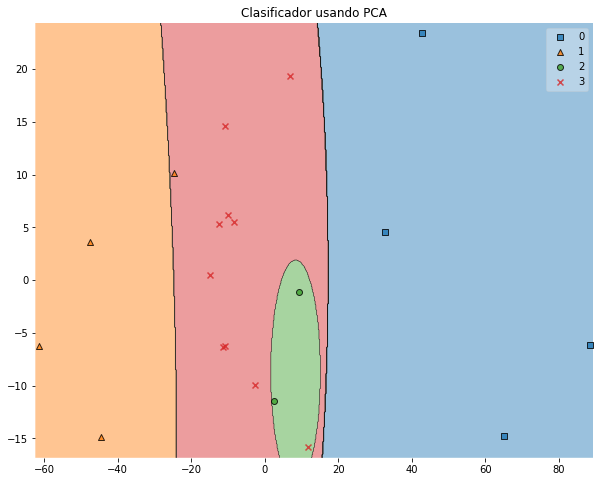

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


# Primero definimos las variables X e Y, como arrays de numpy
df_sinpuntos = df

X = df.values[:,0:7]
Y = df.values[:,7]

le = LabelEncoder()
y2 = le.fit_transform(Y)
y = y2

print(X,y)

###### Generamos un nuevo dataframe con sol dos componentes.
pca_2c = PCA(n_components=2)
X_pca_2c = pca_2c.fit_transform(X)
print(X_pca_2c.shape)


pca_2c.explained_variance_ratio_.sum()
#   Out:    0.97763177502480336

###### Miramos el gráfico
from sklearn.naive_bayes import GaussianNB 
from mlxtend.plotting import plot_decision_regions



X=X_pca_2c
model = GaussianNB()
clf=model
clf.fit(X, y)

print(X,Y)

# Generamos el gráfico
fig = plt.figure(figsize=(10,8))
fig = plot_decision_regions(X=X, y=y, clf=clf)


plt.title("Clasificador usando PCA")


